In [3]:
import tensorflow as tf
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from scipy import signal

In [4]:
model = VGG16()
model.summary()
kernels, biases = model.layers[1].get_weights()
model.layers[1].get_config()
image = cv.imread('../PIC/bird.jpg')
image = cv.resize(image, (224, 224))

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 110ms/step


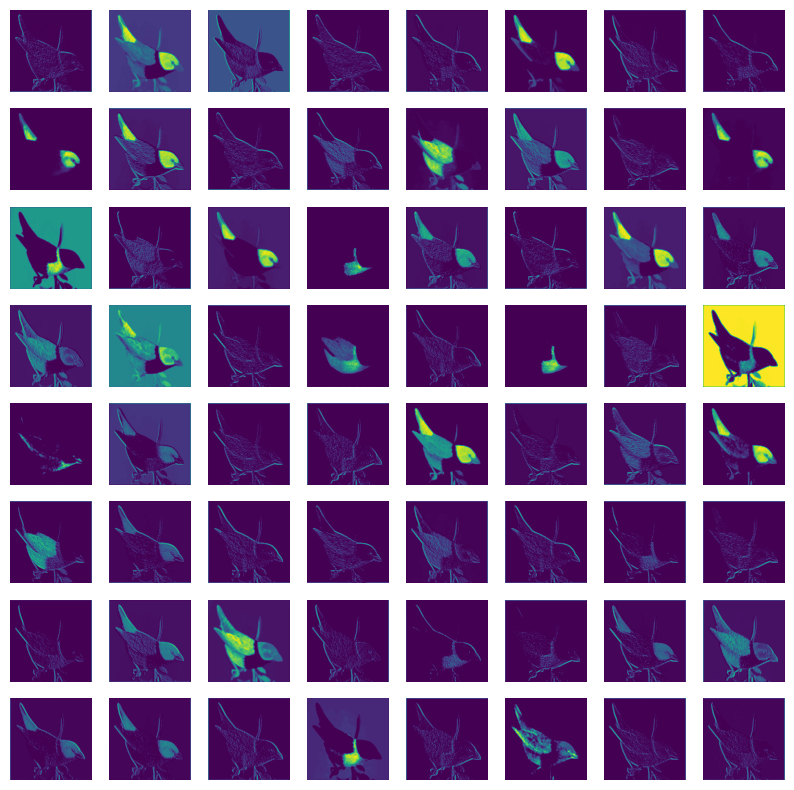

In [5]:
img = img_to_array(image)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
feature_map = model.predict(img)


num_channels = feature_map.shape[-1]

rows = int(np.sqrt(num_channels))
cols = int(np.ceil(num_channels / rows))

plt.figure(figsize=(10, 10))  # Adjust the figure size as needed


for i in range(num_channels):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(feature_map[0, :, :, i], cmap='gray')
    plt.axis('off')


plt.tight_layout
plt.show()                      

3.2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


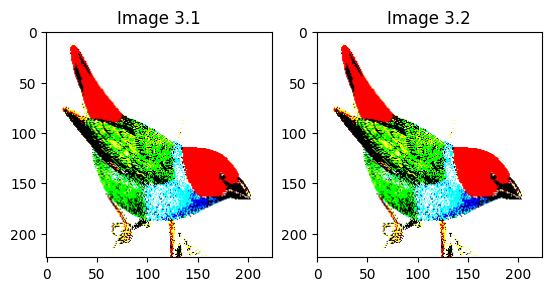

In [21]:
img2 = cv.imread('../PIC/bird.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img2 = cv.resize(img2, (224, 224))

img_copy = img2.copy()
img2 = img2.reshape(1, img2.shape[0], img2.shape[1], 3)
img_mean = [123.68, 116.779, 103.939]
img2 = img2-img_mean

plt.subplot(1, 2, 1)
plt.title("Image 3.1")
plt.imshow(img[0])

plt.subplot(1,2,2)
plt.title("Image 3.2")
plt.imshow(img2[0])


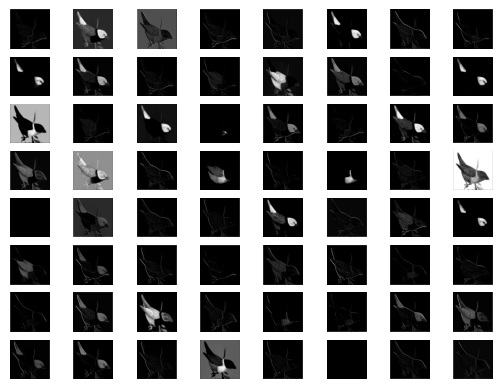

In [24]:
for j in range(64):
    for i in range(3):
        img2[0,:, :, i] = signal.convolve2d(img_copy[:, :, i], kernels[:, :, i, j], mode='same')
    image_sum = img2[0,:, :, 0]+img2[0,:, :, 1]+img2[0,:, :, 2]
    Relu = np.maximum(image_sum, 0, image_sum)
    plt.subplot(8, 8, j+1)
    plt.imshow(Relu, cmap='gray')
    plt.axis('off')
plt.show()